In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import missingno as msno
import pandas as pd
import itertools
import cv2
import imageio
import os
from glob import glob

import natsort

# Info

세포 반지름 : 0.004mm

플레이트 반지름 : 17.35mm

세포가 감염이후 바이러스를 생성하기 까지 걸리는 시간

Zaire(Ebola) : (3h < t < 9h)

Angola(Marburg) : (3h < t < 6h)

세포 감염 이후 사멸까지의 시간

Zaire(Ebola) : (30h < t < 33h)

Angola(Marburg) : (30h < t < 33h)

플레이트별 전체 세포의 숫자 (Cells/well)

- 2NPC1 : 17973293.5776692
- Y420S : 17118155.51574
- P424A : 17692061.2927496
- S425L : 22134220.3589782
- D502E : 19197465.126289
- D508N : 17747742.9230097

In [2]:
path = '../data/'

im_path = '../data/Figure/'

In [3]:
# 멀티 인덱스로 가져야되나?
# sheet도 여러개라서 다시 사용해야됨 Days2부터 있음.
plaque = pd.read_excel(path + 'plaque_processed.xlsx')
plaque

,Virus,Day,SNPs,Index,X,Y,Size [sqmm],Mean Spot Intensity,Max Spot Intensity,Circularity
0,Angola,Day2,2NPC1,24,19.663293,23.153970,0.917399,0.785083,0.937255,1.320042
1,NaN,NaN,NaN,30,2.844735,19.925715,1.270655,0.822522,0.949020,1.422423
2,NaN,NaN,NaN,31,19.619222,18.813872,0.711774,0.726718,0.933333,1.264626
3,NaN,NaN,NaN,32,27.559517,16.893689,0.165199,0.712244,0.901961,1.187720
4,NaN,NaN,NaN,33,14.248888,15.565058,0.653779,0.715452,0.917647,1.463410
...,...,...,...,...,...,...,...,...,...,...
661,NaN,NaN,NaN,7,11.141883,21.636296,10.388520,0.680900,0.898000,1.645496
662,NaN,NaN,NaN,8,29.369066,20.143690,9.743524,0.705700,0.909800,1.575720
663,NaN,NaN,NaN,12,4.307396,14.662917,11.803303,0.749300,0.917600,1.591042
664,NaN,NaN,NaN,14,15.784313,13.388278,9.942119,0.665000,0.886300,1.696404


In [4]:
plaque.fillna(method='ffill', inplace=True)

In [5]:
df = plaque.groupby(['Virus','Day','SNPs'])

In [6]:
# 그룹별 데이터프레임을 생성 후 dict에 저장
output = dict(list(df))
output.keys()

dict_keys([('Angola', 'Day2', '2NPC1'), ('Angola', 'Day2', 'D502E'), ('Angola', 'Day2', 'D508N'), ('Angola', 'Day2', 'P424A'), ('Angola', 'Day2', 'S425L'), ('Angola', 'Day2', 'Y420S'), ('Angola', 'Day3', '2NPC1'), ('Angola', 'Day3', 'D502E'), ('Angola', 'Day3', 'D508N'), ('Angola', 'Day3', 'P424A'), ('Angola', 'Day3', 'S425L'), ('Angola', 'Day3', 'Y420S'), ('Angola', 'Day4', '2NPC1'), ('Angola', 'Day4', 'D502E'), ('Angola', 'Day4', 'D508N'), ('Angola', 'Day4', 'P424A'), ('Angola', 'Day4', 'S425L'), ('Angola', 'Day4', 'Y420S'), ('Angola', 'Day5', '2NPC1'), ('Angola', 'Day5', 'D502E'), ('Angola', 'Day5', 'D508N'), ('Angola', 'Day5', 'P424A'), ('Angola', 'Day5', 'S425L'), ('Angola', 'Day5', 'Y420S'), ('Angola', 'Day6', '2NPC1'), ('Angola', 'Day6', 'D502E'), ('Angola', 'Day6', 'D508N'), ('Angola', 'Day6', 'P424A'), ('Angola', 'Day6', 'S425L'), ('Angola', 'Day6', 'Y420S'), ('Zaire', 'Day2', '2NPC1'), ('Zaire', 'Day2', 'D502E'), ('Zaire', 'Day2', 'D508N'), ('Zaire', 'Day2', 'P424A'), ('Zaire

In [11]:
day_list = ['Day2', 'Day3', 'Day4', 'Day5', 'Day6']
plaque_list = ['2NPC1','Y420S', 'P424A', 'S425L', 'D502E','D508N']

def S_type(virus:str,Day : str):
    temp = pd.DataFrame()
    for i in plaque_list:
        temp = pd.concat([temp, output[(virus, Day, i)]])
    return temp

def D_type(virus, snps):
    temp = pd.DataFrame()
    for i in day_list:
        temp = pd.concat([temp, output[(virus,i , snps)]])
    return temp

In [12]:
S_type('Angola','Day6')

,Virus,Day,SNPs,Index,X,Y,Size [sqmm],Mean Spot Intensity,Max Spot Intensity,Circularity
245,Angola,Day6,2NPC1,2,22.049747,30.722570,18.831514,0.815900,0.956900,1.844405
246,Angola,Day6,2NPC1,3,11.366819,30.101305,18.075791,0.791800,0.960800,1.706059
247,Angola,Day6,2NPC1,4,16.520040,28.607577,19.441366,0.814700,0.952900,1.536254
248,Angola,Day6,2NPC1,7,24.037976,25.775766,18.457171,0.827900,0.949000,1.593650
249,Angola,Day6,2NPC1,14,29.031557,22.318819,19.868438,0.823000,0.941200,1.580026
250,Angola,Day6,2NPC1,30,10.837770,10.815590,17.903560,0.821300,0.941200,1.596791
251,Angola,Day6,2NPC1,33,16.082448,9.152467,17.154867,0.776900,0.925500,1.552050
252,Angola,Day6,Y420S,14,18.465551,25.759868,21.741928,0.818394,0.913725,1.603196
253,Angola,Day6,Y420S,15,8.014680,23.250970,22.481825,0.808110,0.921569,1.636049
254,Angola,Day6,Y420S,17,22.078549,21.478813,22.926476,0.829976,0.913725,1.572483


In [13]:
D_type('Angola', 'D508N')

,Virus,Day,SNPs,Index,X,Y,Size [sqmm],Mean Spot Intensity,Max Spot Intensity,Circularity
36,Angola,Day2,D508N,1,18.284411,31.968074,0.901582,0.827700,0.913700,1.367223
37,Angola,Day2,D508N,2,11.307811,31.127582,0.843585,0.817300,0.913700,1.329149
38,Angola,Day2,D508N,3,23.340762,30.260417,1.052727,0.830800,0.921600,1.497381
39,Angola,Day2,D508N,4,23.484750,28.150128,0.838312,0.812500,0.917600,1.298559
40,Angola,Day2,D508N,5,14.990165,27.446423,0.534268,0.766100,0.898000,1.213397
...,...,...,...,...,...,...,...,...,...,...
244,Angola,Day5,D508N,35,25.826987,5.939271,13.188208,0.809791,0.921569,1.576367
282,Angola,Day6,D508N,1,15.114490,30.582715,14.453599,0.854515,0.933333,1.822880
283,Angola,Day6,D508N,21,13.218435,11.745063,17.163656,0.810427,0.929412,2.142289
284,Angola,Day6,D508N,22,19.295984,10.798389,17.617090,0.805995,0.921569,2.118204


In [49]:
def I_read(path):
    im = cv2.imread(path)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    plt.imshow(im)

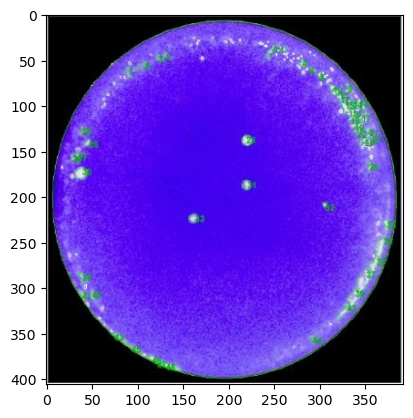

In [21]:
I_read(im_path + 'Angola_day2_2NPC1.jpg')

In [61]:
def m_gif(virus, snps):
  im_filepa = glob(im_path+f'/{virus}/{snps}/*.jpg')
  im_filepa = natsort.natsorted(im_filepa)

  directory = f'../data/Figure/{virus}/'
  image_type = '.jpg'
  gif_name = f'output_{snps}'
  speed_sec = { 'duration': 0.2 } #사진 넘기는 시간

  images = []

  for file in im_filepa:
    images.append(imageio.imread(file))
    
  imageio.mimsave('{0}/{1}.gif'.format(directory, gif_name), images, **speed_sec)

In [64]:
snps_list = ['2NPC1','Y420S', 'P424A', 'S425L', 'D502E','D508N']
virus_list = ['Angola', 'Zaire']
for i in virus_list:
    for j in snps_list:
        m_gif(i, j)

/var/folders/7w/f3yz5lls31n4jsq13_dmd6z40000gn/T/ipykernel_43491/2430717972.py:13: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(file))
